In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import expon 

In [3]:
data2 = np.loadtxt("low.txt",dtype=np.dtype('u8'))

In [4]:
data2.size

5976500

In [5]:
data2[:50]

array([9223372038430766720, 9223372038431682456, 9223372038432133372,
       4611686020004929220, 4611686020005206280, 9223372038432703120,
       4611686020005590736, 4611686020005844216, 9223372038433312660,
       4611686020005967984, 4611686020005967996, 9223372038434747848,
       4611686020007423796, 4611686020007648584, 9223372038435152632,
       9223372038435696796, 9223372038436099984, 4611686020009054376,
       9223372038437137704, 9223372038437679148, 9223372038438500984,
       9223372038438612944, 9223372038438878636, 4611686020011969712,
       9223372038439670376, 9223372038439944716, 4611686020012638704,
       9223372038440196448, 4611686020012823580, 4611686020013461908,
       9223372038441090556, 4611686020013730452, 4611686020014388956,
       9223372038442229360, 9223372038442931948, 4611686020015903408,
       4611686020015925020, 4611686020016489668, 4611686020017062956,
       4611686020017062960, 9223372038444769588, 4611686020017411096,
       9223372038445

In [6]:
print(9223372036854780224-2**63)

4416


In [7]:
print(4611686018427395956-2**62)

8052


In [8]:
data2_ch1=data2[(data2 & 2**63) >0] & (2**62-1)
print(data2_ch1.size)

3173220


In [9]:
data2_ch2=data2[(data2 & 2**62) >0] & (2**62-1)
print(data2_ch2.size)

2803611


In [10]:
print(data2_ch1.size+data2_ch2.size)

5976831


In [11]:
data2_ch12 = data2[np.logical_and((data2 & 2**63) >0,(data2 & 2**62) >0)] & (2**62-1)

In [12]:
print(data2_ch12.size)

331


In [13]:
diff_ch1 = np.ediff1d(data2_ch1)*0.0125
diff_ch2 = np.ediff1d(data2_ch2)*0.0125
print(1e6/diff_ch1.mean())
print(1e6/diff_ch2.mean())

469.278801929
414.619557479


(0, 1000)

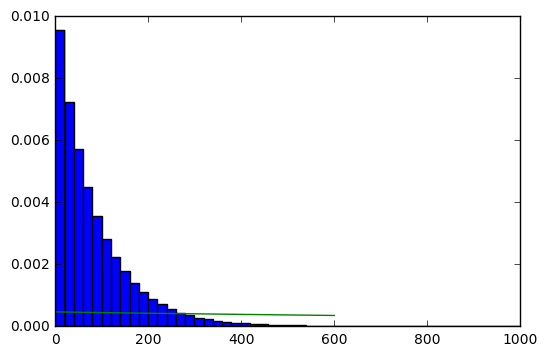

In [14]:
diffx=np.linspace(0,600,100)
ch1=plt.hist(diff_ch1, bins=10000, normed=True)
plt.plot(diffx,expon.pdf(diffx,scale=diff_ch1.mean()))
plt.xlim((0,1000))

(0, 1000)

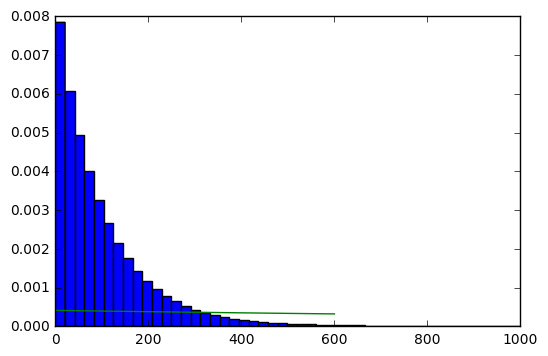

In [15]:
ch2=plt.hist(diff_ch2, bins=10000, normed=True)
plt.plot(diffx,expon.pdf(diffx,scale=diff_ch2.mean()))
plt.xlim((0,1000))

In [16]:
np.save("low_diff_ch1",diff_ch1)
np.save("low_diff_ch2",diff_ch2)